 0.0    1.00000 
2000.0  214.11935 
4000.0  218.88245 
6000.0  216.26894 
8000.0  214.07107 
10000.0  215.03624 
12000.0  217.97195 
14000.0  219.28516 
16000.0  217.47586 
18000.0  214.65629 
20000.0  214.24896 


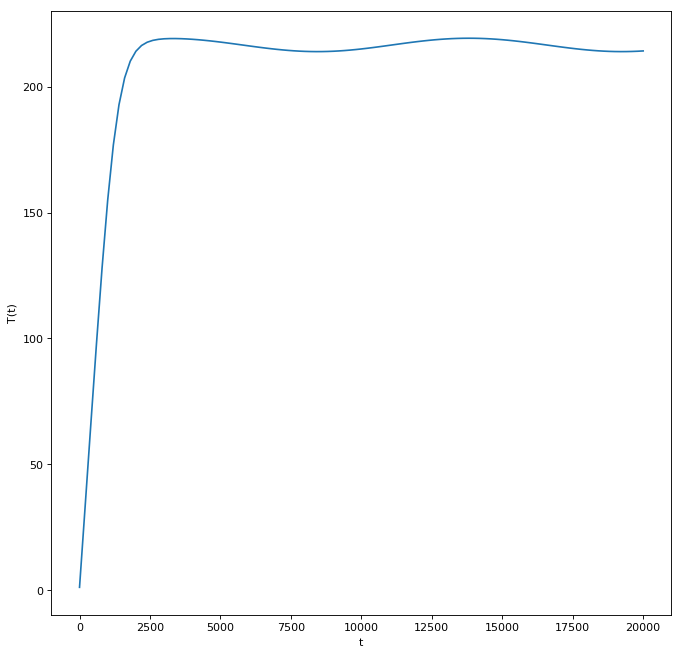

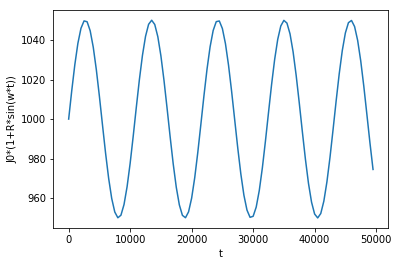

In [2]:
import numpy as np
from matplotlib import pylab as plt
from math import sqrt
 
def rk4(f, x0, y0, x1, n):
    vx = [0] * (n + 1)
    vy = [0] * (n + 1)
    h = (x1 - x0) / float(n)
    vx[0] = x = x0
    vy[0] = y = y0
    for i in range(1, n + 1):
        k1 =  f(x, y)
        k2 =  f(x + 0.5 * h, y + 0.5*h * k1)
        k3 =  f(x + 0.5 * h, y + 0.5*h * k2)
        k4 =  f(x + h, y + h*k3)
      
        vx[i] = x = x0 + i * h
        vy[i] = y = vy[i-1] + (k1 + k2 + k2 + k3 + k3 + k4)*h / 6
    return vx, vy
 
def f(x, y):
    As=0.2
    J0=1000
    R=0.05
    w=5.82/10000
    q=0
    eps=0.8
    sigm=5.67/100000000
    p=2700
    Cp=920
    delta=0.5/1000
#  (0.2*1000*(1+0.05*np.sin(5.82/10000*x)) + 0 - 2*0.8*5.67/100000000*y*y*y*y) / (2700*920*0.5/1000)
    return (As*J0*(1+R*np.sin(w*x)) + q - 2*eps*sigm*y*y*y*y) / (p*Cp*delta)
 
vx, vy = rk4(f, 0, 1, 20000, 100)
for x, y in list(zip(vx, vy))[::10]:
    print("%4.1f %10.5f " % (x, y))

fig = plt.figure(figsize=(10,10), dpi=80)
plt.xlabel('t')
plt.ylabel('T(t)')
plt.plot(vx, vy)

fig1 = plt.figure()
x= np.arange(0, 50000, 500)
plt.xlabel('t')
plt.ylabel('J0*(1+R*sin(w*t))')
plt.plot(x, 1000*(1+0.05*np.sin(5.82/10000*x)))

plt.show()